<h1 align="center">Desempenho dos Alunos</h1>

Data Scientist Jr.: Karina Gonçalves Soares

Links de estudo:
* [Seaborn.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

### 1. Importando Bibliotecas 📚

In [1]:
import numpy as np
import pandas as pd # pip install Pyarrow will
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import os

/tmp/ipykernel_25066/3636104362.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # pip install Pyarrow will


### 2. Carregamento dos Dados ⚡️

In [2]:
df = pd.read_csv("/home/karinag/karina_python/git-hub/kmeans/2_StudentsPerformance/dataset/StudentsPerformance.csv")

### 3. Analisando o Conjunto de Dados 🔍

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [5]:
df.shape

(1000, 8)

In [6]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

### 4. Descrição do Dataset 📝

In [7]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### 5. Checando quais colunas possuem valores nulos ✅

In [8]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### 6. Informação dos Dados ℹ️

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 7. Valores Duplicados ♊

In [10]:
df_p = df.duplicated().any()
df_p

False

### 8. Pré-processamento dos Dados ⚙️

In [11]:
# Etnia
df['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [12]:
# Escolaridade dos pais
df['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [13]:
# Lanche
df['lunch'].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [14]:
# Curso de preparação
df['test preparation course'].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

In [15]:
import numpy as np

# Substituir "none" por NaN em 'test preparation course'
df.loc[df['test preparation course'] == "none", 'test preparation course'] = np.NaN

# Preencher os valores NaN em 'test preparation course' com "not completed"
df['test preparation course'] = df['test preparation course'].fillna(value="not completed")


In [16]:
df["test preparation course"].sample(10)

977    not completed
336        completed
290    not completed
701    not completed
705    not completed
559    not completed
537    not completed
739    not completed
838        completed
222    not completed
Name: test preparation course, dtype: object

A função pairplot do [Seaborn](https://seaborn.pydata.org/) (uma biblioteca Python para visualização de dados baseada no Matplotlib) é utilizada para criar um gráfico de pares. Neste gráfico, estamos analisando quatro variáveis: pontuação em matemática, pontuação em leitura, pontuação em escrita e o curso de preparação para teste. Observamos se essas variáveis estão relacionadas. Quanto mais próximas e lineares as agrupações, maior é a correlação entre os dados. Estamos também examinando como a preparação dos alunos influencia em suas pontuações.

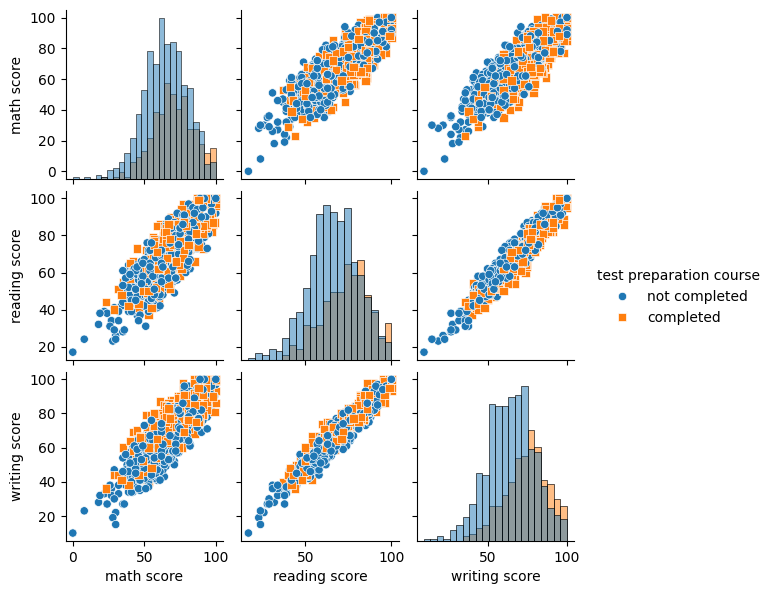

In [17]:
sns.pairplot(df.iloc[:, [4,5,6,7]], hue='test preparation course', 
             diag_kind="hist", markers=['o','s'],
             height=2)
plt.show()

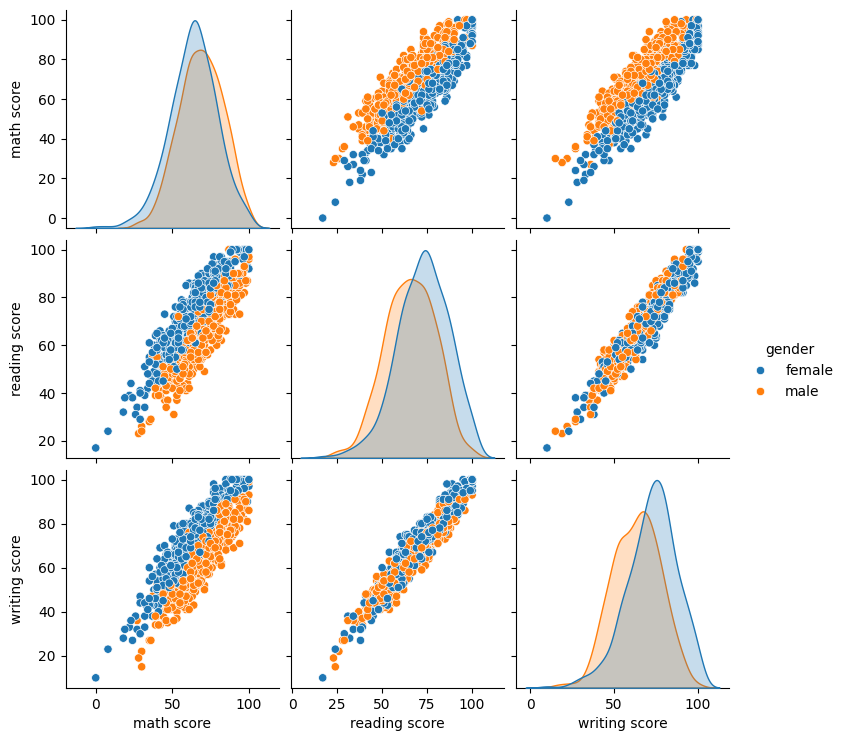

In [18]:
sns.pairplot(data = df,hue="gender")
plt.show()

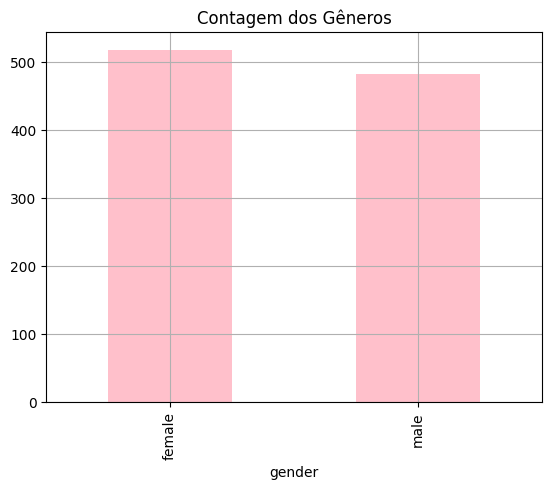

In [19]:
df['gender'].value_counts().plot(kind='bar', color='pink',)
plt.title('Contagem dos Gêneros')
plt.grid(True)

            
### 9. Outlier


In [20]:
import matplotlib.pyplot as pl

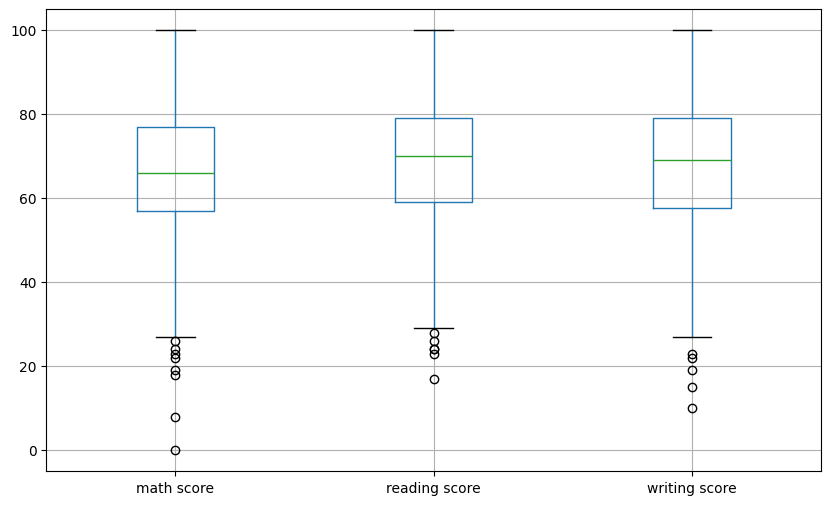

In [21]:
plt.figure(figsize=(10,6))
df.boxplot();

### 10. Encoder

Transformando variávei categóricas em variáveis numéricas.

In [22]:
df_en = df.copy()

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
LablE = LabelEncoder()
df_en["gender"] = LablE.fit_transform(df["gender"])
df_en["race/ethnicity"] = LablE.fit_transform(df["race/ethnicity"])
df_en["parental level of education"] = LablE.fit_transform(df["parental level of education"])
df_en["lunch"]= LablE.fit_transform(df["lunch"])
df_en["test preparation course"]= LablE.fit_transform(df["test preparation course"])

In [25]:
df_en.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


### 11. Standardization

Escalonar os dados consiste na padronização das características dos mesmos, onde os transformamos para ter uma média de 0 e um desvio padrão de 1. `Esta padronização é realizada para garantir que o nosso modelo generalize bem e não fique enviezado`. Por exemplo, se tivermos uma coluna 'idade' variando de 0 a 20 e outra coluna 'salário' variando de 1000 a 200000, o modelo pode acabar sendo enviesado em direção aos salários. Para evitar isso, realizamos a padronização utilizando o método StandardScaler. 

Existem algumas técnicas comuns para escalonar os dados.

1. Min-Max Scaling (Escalonamento Min-Máx): Neste método, os valores são transformados para um intervalo específico, comumente entre 0 e 1. A fórmula geral para o Min-Max Scaling é:

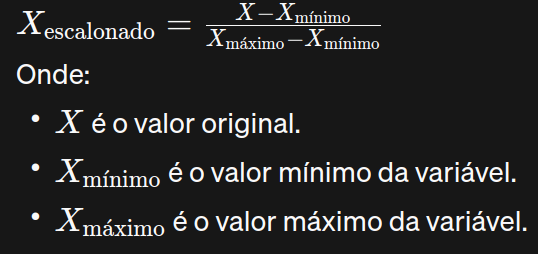

2. Standardization (Padronização): Neste método, os valores são transformados para terem média zero e desvio padrão um. A fórmula geral para a padronização é:

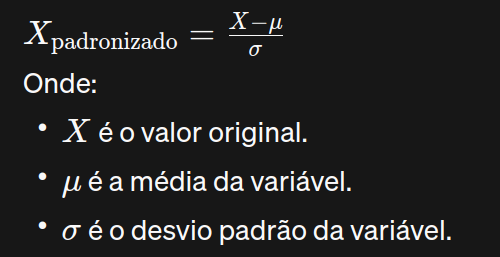


In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
x = df.iloc[:, [5,6,7]].values
sc_x = StandardScaler()
x = sc_x.fit_transform(x)

In [28]:
x

array([[ 0.39002351,  0.19399858,  0.39149181],
       [ 0.19207553,  1.42747598,  1.31326868],
       [ 1.57771141,  1.77010859,  1.64247471],
       ...,
       [-0.46775108,  0.12547206, -0.20107904],
       [ 0.12609287,  0.60515772,  0.58901542],
       [ 0.71993682,  1.15336989,  1.18158627]])

### 12. k-mean

In [29]:
from sklearn.cluster import KMeans # Classe kmeans da biblioteca sklearn

In [30]:
wcss = [] # Within-Cluster Sum of Squares / Soma de quadrados dentro do cluster

#### O Método do cotovelo

O método do cotovelo sugere escolher o ponto no gráfico onde a inércia começa a diminuir a uma taxa mais lenta, formando um "cotovelo". Esse ponto é geralmente considerado o número ideal de clusters.

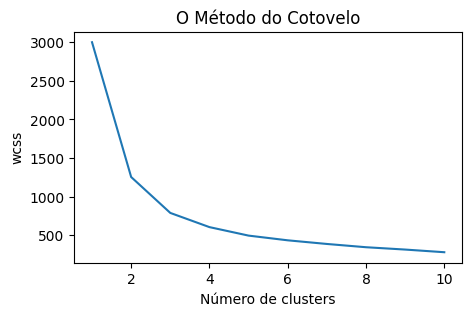

In [31]:
plt.figure(figsize=(5,3))
for i in range(1, 11):
        # Inicializando objeto KMeans usando a inicialização "k-means++" p/ escolher os centroides.
        kmeans = KMeans(n_clusters=i, init="k-means++", random_state=0)
        kmeans.fit(x)
        wcss.append(kmeans.inertia_) # Métrica que calcula a soma dos quadrados das distâncias dos pontos ao centróide mais próximo.
plt.plot(range(1,11), wcss) # Plota o gráfico da inércia em relação ao número de clusters, variando de 1 a 10.
plt.title("O Método do Cotovelo")
plt.xlabel("Número de clusters")
plt.ylabel("wcss")
plt.show()

In [32]:
# init="k-means++" escolhe a melhorforma p/ colocar nossos clusters para que o processo de dividir os dados seja mais rápido.
kmeans= KMeans(n_clusters=3, init = "k-means++", random_state=42)
y_kmeans= kmeans.fit_predict(x) # Ajusta o modelo e retorna os rótulos dos clusters para cada amostra.

In [33]:
df['cluster'] = y_kmeans
df.head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,cluster
0,female,group B,bachelor's degree,standard,not completed,72,72,74,0
1,female,group C,some college,standard,completed,69,90,88,2
2,female,group B,master's degree,standard,not completed,90,95,93,2
3,male,group A,associate's degree,free/reduced,not completed,47,57,44,1
4,male,group C,some college,standard,not completed,76,78,75,2
5,female,group B,associate's degree,standard,not completed,71,83,78,2
6,female,group B,some college,standard,completed,88,95,92,2
7,male,group B,some college,free/reduced,not completed,40,43,39,1
8,male,group D,high school,free/reduced,completed,64,64,67,0
9,female,group B,high school,free/reduced,not completed,38,60,50,1


In [34]:
df["math score"].unique()

array([ 72,  69,  90,  47,  76,  71,  88,  40,  64,  38,  58,  65,  78,
        50,  18,  46,  54,  66,  44,  74,  73,  67,  70,  62,  63,  56,
        97,  81,  75,  57,  55,  53,  59,  82,  77,  33,  52,   0,  79,
        39,  45,  60,  61,  41,  49,  30,  80,  42,  27,  43,  68,  85,
        98,  87,  51,  99,  84,  91,  83,  89,  22, 100,  96,  94,  48,
        35,  34,  86,  92,  37,  28,  24,  26,  95,  36,  29,  32,  93,
        19,  23,   8])

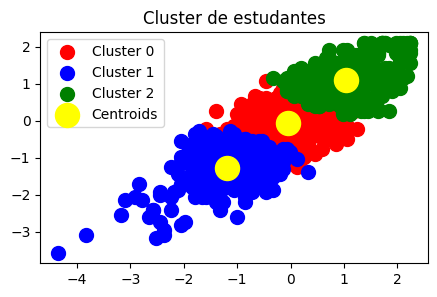

In [35]:
plt.figure(figsize=(5,3))
plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1], s=100, c="red", label= "Cluster 0")
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1], s=100, c="blue", label= "Cluster 1")
plt.scatter(x[y_kmeans==2,0], x[y_kmeans==2,1], s=100, c="green", label= "Cluster 2")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c="yellow", label="Centroids")
plt.title("Cluster de estudantes")
plt.legend()
plt.show()

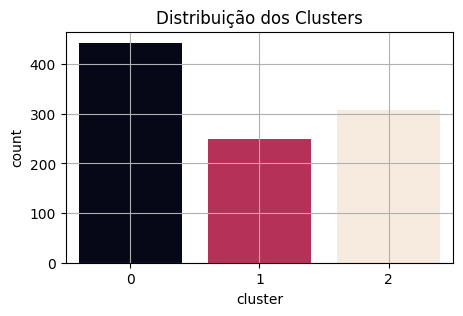

In [36]:
plt.figure(figsize=(5,3))
pl = sns.countplot(x=df["cluster"],hue=df["cluster"], palette="rocket", legend=False)
pl.set_title("Distribuição dos Clusters")
pl.grid()
plt.show()

In [37]:
# Visualizando a média das notas de cada cluster
cluster_means = df.groupby('cluster')[['math score', 'reading score', 'writing score']].mean()
cluster_means

,math score,reading score,writing score
cluster,,,
0,65.338600,68.458239,67.821670
1,48.096386,50.670683,48.485944
2,81.714286,85.146104,84.207792


In [38]:
# Quantidade de gênero F e M de cada cluster
gender_dis = df.groupby(['cluster', 'gender']).size().unstack(fill_value=0)
gender_dis

gender,female,male
cluster,,
0,232,211
1,104,145
2,182,126


In [39]:
# Direito a alimentação com desconto e alimentação padrão
lunch_dis = df.groupby(['cluster', 'lunch']).size().unstack(fill_value=0)
lunch_dis

lunch,free/reduced,standard
cluster,,
0,145,298
1,139,110
2,71,237
